In [1]:
# importing all the needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data into a dataframe
df = pd.read_csv("DARWIN.csv")
df.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [3]:
# Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


In [4]:
df.dtypes

ID                  object
air_time1            int64
disp_index1        float64
gmrt_in_air1       float64
gmrt_on_paper1     float64
                    ...   
paper_time25         int64
pressure_mean25    float64
pressure_var25     float64
total_time25         int64
class               object
Length: 452, dtype: object

In [5]:
# Divided the data into target and predictor variables
y = pd.DataFrame(df['class'],columns=['class'])
df = df.drop(labels=['ID','class'],axis=1)


In [6]:
# y is out target variable with class labels P and H 
y

,class
0,P
1,P
2,P
3,P
4,P
...,...
169,H
170,H
171,H
172,H


In [7]:
# Checking if there are any null values in the data set
df.isnull().sum()

air_time1           0
disp_index1         0
gmrt_in_air1        0
gmrt_on_paper1      0
max_x_extension1    0
                   ..
num_of_pendown25    0
paper_time25        0
pressure_mean25     0
pressure_var25      0
total_time25        0
Length: 450, dtype: int64

In [8]:
# Checking if there are any missing values in the dataframe
df.isna().sum()

air_time1           0
disp_index1         0
gmrt_in_air1        0
gmrt_on_paper1      0
max_x_extension1    0
                   ..
num_of_pendown25    0
paper_time25        0
pressure_mean25     0
pressure_var25      0
total_time25        0
Length: 450, dtype: int64

In [9]:
# Checking null values for the target variable 
y.isnull().sum()

class    0
dtype: int64

In [10]:
# Checking missing values for the target variable
y.isna().sum()

class    0
dtype: int64

In [11]:
# the classification count for the target variable
y.value_counts()

class
P        89
H        85
dtype: int64

In [12]:
# Highest class gets mapped to 1 and the other to 0 (Converting categorical variable to binary)
y['class'] = y['class'].map({'P':1,'H':0})
y.head()

,class
0,1
1,1
2,1
3,1
4,1


In [13]:
y.value_counts()

class
1        89
0        85
dtype: int64

In [14]:
df[:1]

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,5160,0.000013,120.804174,86.853334,957,6601,0.3618,0.217459,103.828754,0.051836,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605


In [15]:
# Looking at the datatypes of the features
display(df.dtypes.to_string())

'air_time1                  int64\ndisp_index1              float64\ngmrt_in_air1             float64\ngmrt_on_paper1           float64\nmax_x_extension1           int64\nmax_y_extension1           int64\nmean_acc_in_air1         float64\nmean_acc_on_paper1       float64\nmean_gmrt1               float64\nmean_jerk_in_air1        float64\nmean_jerk_on_paper1      float64\nmean_speed_in_air1       float64\nmean_speed_on_paper1     float64\nnum_of_pendown1            int64\npaper_time1                int64\npressure_mean1           float64\npressure_var1            float64\ntotal_time1                int64\nair_time2                  int64\ndisp_index2              float64\ngmrt_in_air2             float64\ngmrt_on_paper2           float64\nmax_x_extension2           int64\nmax_y_extension2           int64\nmean_acc_in_air2         float64\nmean_acc_on_paper2       float64\nmean_gmrt2               float64\nmean_jerk_in_air2        float64\nmean_jerk_on_paper2      float64\nmean_speed_in

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 450 entries, air_time1 to total_time25
dtypes: float64(300), int64(150)
memory usage: 611.8 KB


In [17]:
# Splitting the data into train and test sets with 75 and 25 percent
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.25, random_state=1)

In [18]:
X_train.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
56,2640,0.000011,197.890810,138.510957,1912,8214,0.201585,0.126801,168.200884,0.029140,...,238.719902,0.081834,0.025759,3.566676,4.785148,93,36125,1856.262837,155739.52800,106760
44,3720,0.000010,263.252553,150.394284,1049,9005,0.392947,0.169245,206.823418,0.064320,...,347.824522,0.244135,0.022231,7.899764,3.929554,49,30105,1961.516027,84889.52196,41280
81,3235,0.000008,285.310405,306.741968,2710,5757,0.550117,0.237772,296.026187,0.099228,...,264.310776,0.205982,0.018896,4.806361,3.335828,60,35920,1929.296214,94373.02807,59175
33,2630,0.000013,276.714723,181.317565,1639,11729,0.218019,0.164965,229.016144,0.030151,...,205.611943,0.126723,0.018062,4.296292,2.584401,84,46880,1007.974936,162033.71240,128215
18,6365,0.000011,78.339161,118.660574,1425,7755,0.127188,0.119886,98.499867,0.016190,...,169.917101,0.117464,0.018629,3.498404,2.073031,119,59035,474.049462,26984.92666,177155


In [19]:
X_test.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
93,820,0.000006,383.299801,205.540128,1450,6510,0.230208,0.169987,294.419964,0.029387,...,280.420732,0.273785,0.021416,6.507507,3.472656,89,35650,1720.844320,205176.87960,83050
114,345,0.000012,556.505801,193.256525,2191,7860,0.317984,0.149155,374.881163,0.047136,...,311.973909,0.220858,0.021177,6.611603,4.243341,65,33475,1911.355937,87703.48361,63630
19,32300,0.000013,139.410773,94.248239,2091,5908,0.415122,0.104892,116.829506,0.072672,...,175.727050,0.102401,0.018792,3.257622,2.273153,106,44470,1615.038565,234812.39170,108950
69,5400,0.000013,203.749975,206.359195,1427,11100,0.359900,0.197051,205.054585,0.052372,...,185.359647,0.088991,0.026235,2.895010,3.087367,79,23150,1759.896976,244975.41210,75275
53,4185,0.000010,161.261471,145.945182,1556,7543,0.353787,0.129616,153.603327,0.059282,...,148.609757,0.096133,0.017372,3.224385,1.780429,149,79225,1669.535816,287020.97290,197280


In [20]:
y_train.head()

,class
56,1
44,1
81,1
33,1
18,1


In [21]:
y_test.head()

,class
93,0
114,0
19,1
69,1
53,1


In [22]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_train, pred)}n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: {confusion_matrix(y_test, pred)}")

In [23]:
'''param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)'''

svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.5227


In [24]:
y_pred_test_1 = svc.predict(X_test)
y_pred_test_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

Confusion matrix

 [[ 1 21]
 [ 0 22]]
False Negative Rate :  0.0


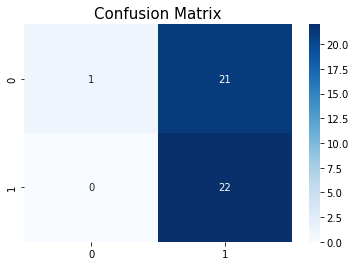

In [25]:


cm = confusion_matrix(y_test, y_pred_test_1)

print('Confusion matrix\n\n', cm)
sns.heatmap(cm, annot=True, cmap = 'Blues')
plt.title("Confusion Matrix", fontsize=15)
#plt.savefig("Confusion Matrix.png", dpi=200)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_test_1).ravel()
#Specificity
specificity = tn/(tn+fp)
# Recall
recall = tp/(tp+fn)

FNR = fn/(fn+tp)

print("False Negative Rate : ",FNR)

In [26]:
svc=SVC(C=100.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8636


In [27]:
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [28]:
pca = PCA(n_components=3)
scaler = StandardScaler()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#pca.score

Text(0, 0.5, 'Second Principal Component')

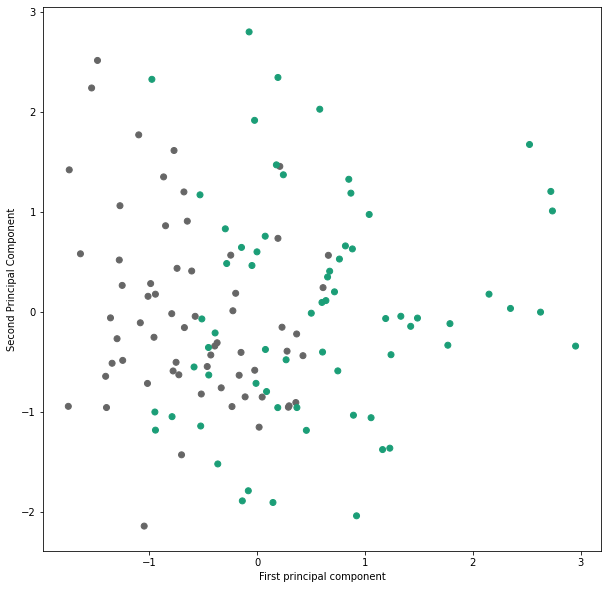

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(X_train[:,0],X_train[:,1],c = y_train['class'],cmap='Dark2_r')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [30]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params: {'C': 0.5, 'gamma': 0.25, 'kernel': 'rbf'}
Train Result:n================================================
Accuracy Score: 79.23%
_______________________________________________
CLASSIFICATION REPORT:n                   0          1  accuracy   macro avg  weighted avg
precision   0.757143   0.833333  0.792308    0.795238      0.796410
recall      0.841270   0.746269  0.792308    0.793769      0.792308
f1-score    0.796992   0.787402  0.792308    0.792197      0.792049
support    63.000000  67.000000  0.792308  130.000000    130.000000
_______________________________________________
Confusion Matrix: n [[53 10]
 [17 50]]n
Test Result:n================================================
Accuracy Score: 84.09%
_______________________________________________
CLASSIFICATION REPORT:n                   0          1  accuracy  macro avg  weighted avg
precision   0.826087   0.857143  0.840909   0.841615      0.841615
recall

False Negative Rate :  0.18181818181818182


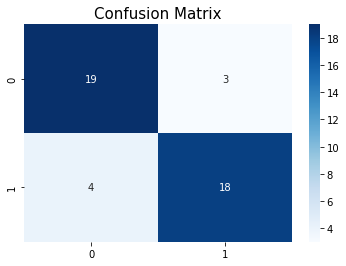

In [31]:


#Predict the result for test values
y_pred = grid.predict(X_test)

#Compute confusion matrix

cm = confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm, annot=True, cmap = 'Blues')
plt.title("Confusion Matrix", fontsize=15)
#plt.savefig("Confusion Matrix.png", dpi=200)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
#Specificity
specificity = tn/(tn+fp)
# Recall
recall = tp/(tp+fn)

FNR = fn/(fn+tp)

print("False Negative Rate : ",FNR)

In [32]:
#Apply k-fold validation here

accuracies = cross_val_score(estimator=grid,X=X_train,y=y_train,cv=10)
accuracies

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Fitting 5 folds for each of 126 candidates, totalling 630 fits
Fitting 5 folds for each of 126 candidates, totalling 630 fits
Fitting 5 folds for each of 126 candidates, totalling 630 fits
Fitting 5 folds for each of 126 candidates, totalling 630 fits
Fitting 5 folds for each of 126 candidates, totalling 630 fits
Fitting 5 folds for each of 126 candidates, totalling 630 fits
Fitting 5 folds for each of 126 candidates, totalling 630 fits
Fitting 5 folds for each of 126 candidates, totalling 630 fits
Fitting 5 folds for each of 126 candidates, totalling 630 fits


array([0.76923077, 0.69230769, 0.61538462, 0.84615385, 0.69230769,
       0.61538462, 0.69230769, 0.92307692, 0.69230769, 0.76923077])

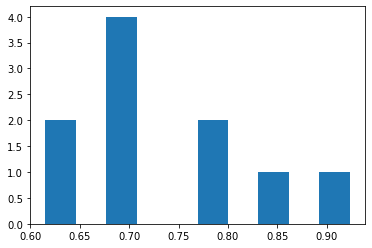

In [33]:
plt.hist(accuracies)
plt.show()

In [34]:
best_accuracy = grid.best_score_
best_accuracy

0.7692307692307692

In [35]:
opt_param = grid.best_params_
opt_param

{'C': 0.5, 'gamma': 0.25, 'kernel': 'rbf'}

In [36]:
print("False Negative Rate : ",FNR)

False Negative Rate :  0.18181818181818182
